In [1]:
from impme import*
import pandas as pd 
import numpy as np 

df= pd.read_csv("hmelq.csv")

###

Historical data were gathered from bank customers to determine whether
a customer is a good or bad credit risk for a home equity loan. Bad risk
customers are more likely to default on the loan.

Home equity loan : Konut sermayesi kredisi, borçlunun evinin hakkını teminat olarak kullandığı bir kredi türüdür.
    Kredi tutarı mülkün değerine göre belirlenir ve mülkün değeri kredi veren kurumdan bir değerleme uzmanı tarafından belirlenir.

BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

LOAN: The amount of the loan requested(Talep edilen kredi miktarı)

MORTDUE: How much the customer needs to pay on their mortgage(Müşterinin ipotek ödemeleri ne kadar).

VALUE: Assessed valuation (An assessed value is the dollar value assigned to a property to measure applicable taxes)
(Değerlendirilen değer, geçerli vergileri ölçmek için bir mülke atanan dolar değeridir)

REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemek için alınan kredi)

(DebtCon :Kısa süreli borçların uzun süreli ya da süresiz borca dönüştürülmesidir)

JOB: Broad job category.

YOJ: Years on the job(num. discrete)

DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)(num. discrete)

DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
(num. discrete)

CLAGE: Age of oldest trade line (oldest tradeline = credit account)(En eski banka hesabı).

NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)( Kredi sorgularının sayısı.)(num. discrete)

CLNO: Number of trade lines.(Kredi notu oluşturmak için önemli bir metrik .)(num. discrete)

DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)

###  
    

# Info

In [2]:
dfInfo = Basic_Information(df)


İlk beş değer

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  

Describe

          count           mean           std      min       25%        50%  \
bad      3576.0       0.199385      0.399594     0.00      0.00      0.000   
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  16200.000   
mortdue  3262.0   74013.907992  44016.833772  2619.00  46700.25  65858.000   
value    3512.0  101076.922759

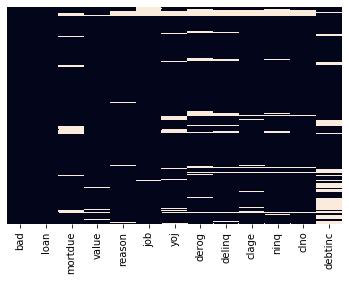

In [4]:
dfInfo.Info()

In [5]:
dfnum = df.select_dtypes(exclude=['object'])

In [5]:
dfvis = Vis(dfnum)

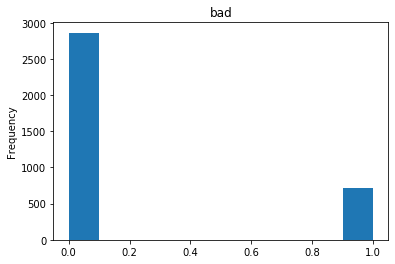

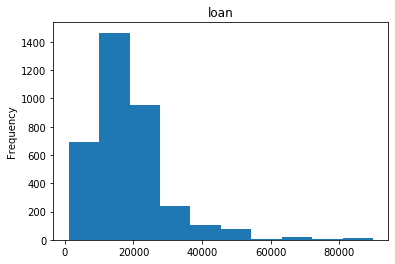

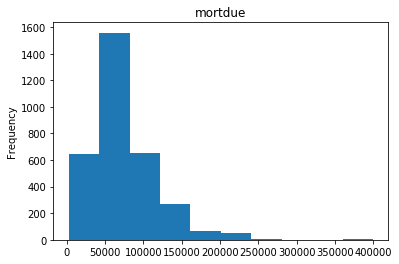

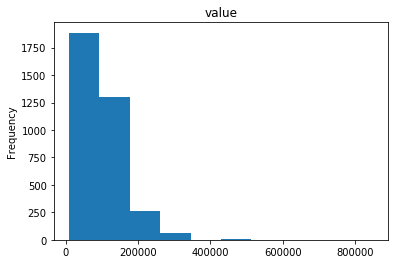

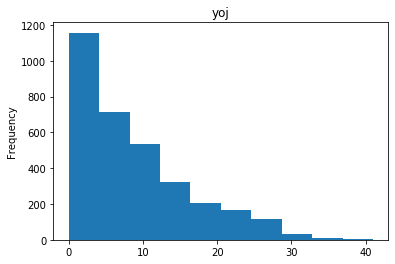

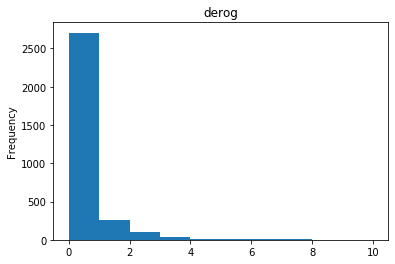

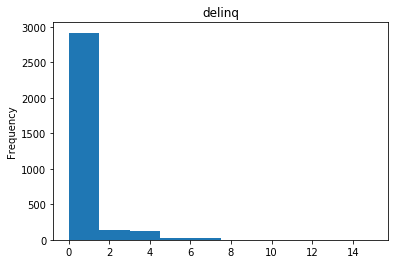

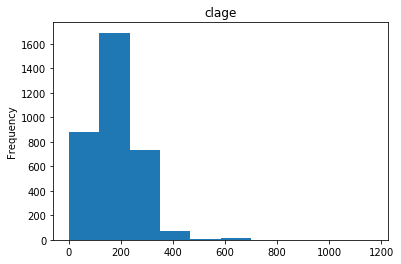

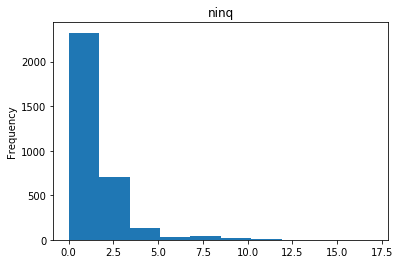

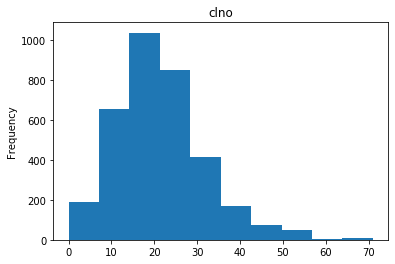

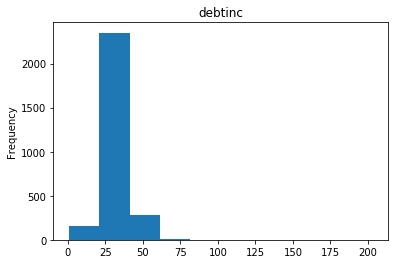

In [6]:
dfvis.hist()

In [6]:
for i in dfnum:
    print(i)
    print(dfnum[i].value_counts())

bad
0    2863
1     713
Name: bad, dtype: int64
loan
15000    65
10000    56
25000    50
20000    42
12000    33
         ..
59200     1
51000     1
46900     1
38700     1
2100      1
Name: loan, Length: 474, dtype: int64
mortdue
50000.0    6
55000.0    6
45000.0    5
62000.0    5
42000.0    5
          ..
54045.0    1
64804.0    1
79185.0    1
89226.0    1
53504.0    1
Name: mortdue, Length: 3095, dtype: int64
value
80000.0     9
65000.0     8
125000.0    7
85000.0     6
60000.0     6
           ..
111287.0    1
103430.0    1
155688.0    1
75446.0     1
72704.0     1
Name: value, Length: 3302, dtype: int64
yoj
0.00    247
1.00    223
4.00    215
2.00    209
5.00    205
       ... 
3.80      1
7.20      1
9.20      1
4.30      1
0.25      1
Name: yoj, Length: 86, dtype: int64
derog
0.0     2706
1.0      265
2.0       98
3.0       35
4.0       14
6.0       10
5.0        8
7.0        7
8.0        3
10.0       2
9.0        1
Name: derog, dtype: int64
delinq
0.0     2517
1.0      398
2.0 

In [2]:
dff = df.copy()

# Preprocess

In [3]:
# Target değişken 'int64' görünüyor ama değil , kategorik yaptık.

dff["bad"]= dff["bad"].astype("object")

In [4]:
# Histogram , describe ve value_counts a bakarak bazı değişkenlerin sürekli bazılarının kesikli olduğunu farkettik . Tanımlarını da 
#dikkate alarak süreklileri ort.ile kesiklileri en çok tekrar eden değerle doldurmaya karar verdik yani '0'.

In [5]:
dfmis = Missing(dff)


In [6]:
# liste olarak istediklerimizi seçtik ortalama ile doldurduk.
# Missing değerleri yazdırarak kontrol ettik.

ls = ['loan', 'mortdue', 'value', 'yoj']

for i in ls:
    dfmis.meann(i)

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64


In [7]:
ls = ['delinq','derog',  'clage', 'clno', 'debtinc','ninq']

for i in ls:
    dfmis.zero(i)

bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog      427
delinq       0
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq       303
clno       133
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq       303
clno         0
debtinc    767
dtype: int64
bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq       303
cln

In [8]:
# kategorik eksikleri 'other' olarak doldurduk .

In [9]:
ls = ['reason', 'job']

for i in ls:
    dfmis.cat(i)

bad          0
loan         0
mortdue      0
value        0
reason       0
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq         0
clno         0
debtinc      0
dtype: int64
bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64


In [10]:
# Eksik değer kalmadı.

In [11]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   object 
 1   loan     3576 non-null   int64  
 2   mortdue  3576 non-null   float64
 3   value    3576 non-null   float64
 4   reason   3576 non-null   object 
 5   job      3576 non-null   object 
 6   yoj      3576 non-null   float64
 7   derog    3576 non-null   float64
 8   delinq   3576 non-null   float64
 9   clage    3576 non-null   float64
 10  ninq     3576 non-null   float64
 11  clno     3576 non-null   float64
 12  debtinc  3576 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 363.3+ KB


Target value ya göre object değerleri crosstab yaptık ve ki kare değerlerine baktık.

In [12]:
dfp = PreProcess(dff)

In [13]:
ls =['reason', 'job']

for i in ls:
    
    dfp.crosstab("bad",i)


reason  DebtCon  HomeImp  Other   All
bad                                  
0          1931      814    118  2863
1           440      244     29   713
All        2371     1058    147  3576
[['Chi-Square test', 9.304347121658731], ['P - value', 0.15717137167903963]]
job  Mgr  Office  Other  ProfEx  Sales  Self   All
bad                                               
0    354     494   1252     639     43    81  2863
1    107      75    346     128     23    34   713
All  461     569   1598     767     66   115  3576
[['Chi-Square test', 43.25094656695884], ['P - value', 2.0473707134227633e-05]]


In [14]:
# job değişkeniyle target değişken arasında bir ilişki vardır.

In [15]:
df.columns

Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

In [16]:
ls =['loan', 'mortdue', 'value','yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc']

for i in ls:
    dfp.groupbi('bad',i)

bad
0    18931.645127
1    16915.708275
Name: loan, dtype: float64
bad
0    75136.838766
1    69504.860580
Name: mortdue, dtype: float64
bad
0    102392.607727
1     95793.884804
Name: value, dtype: float64
bad
0    9.012497
1    8.110457
Name: yoj, dtype: float64
bad
0    0.122249
1    0.664797
Name: derog, dtype: float64
bad
0    0.212714
1    1.102384
Name: delinq, dtype: float64
bad
0    177.292106
1    144.886115
Name: clage, dtype: float64
bad
0    0.937827
1    1.680224
Name: ninq, dtype: float64
bad
0    20.777157
1    20.426367
Name: clno, dtype: float64
bad
0    29.795170
1    13.646251
Name: debtinc, dtype: float64


In [17]:
# derog,delinq,ninq,debtinc

In [18]:
# hedef değeri numerik değerlerin ortalamasına  göre grupladık. Farklı olanları ayırdık.

In [19]:
ls =['loan', 'mortdue', 'value','yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc']

for i in ls:
    dfp.shap(i)

loan
0.8493258953094482 0.0
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
mortdue
0.8743524551391602 0.0
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
value
0.8472325205802917 0.0
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
yoj
0.907394528388977 3.3140708681281924e-42
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
derog
0.31198251247406006 0.0
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
delinq
0.42445874214172363 0.0
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
clage
0.9434936046600342 5.745086868596736e-35
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
ninq
0.6676706671714783 0.0
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
clno
0.9745039343833923 8.498622371227817e-25
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)
debtinc
0.8160082101821899 0.0
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


In [20]:
# Hiçbirşey normal dağılımdan gelmiyor. Bunları gruplayıp ki kare testi yapabiliriz.


Aylık ödemesini geciktirme sayısı 5'den büyükse kötü risk grubuna atılmış.
Aylık ödemesini geciktirme sayısı 5 ve iyi risk tanımlanan müşterilerin mülklerinin değeri diğerleriyle ayrışmış.

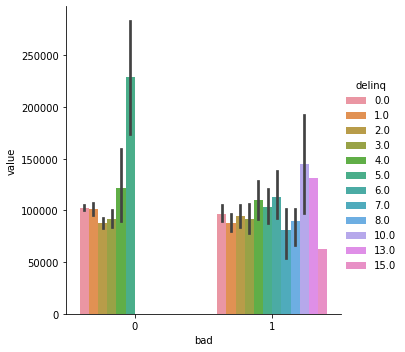

In [21]:
import seaborn as sns
sns.catplot(x="bad", y="value", hue="delinq", kind="bar", data=dff);


In [22]:
dff['derog'].value_counts() # negatif rapor almış , almamışa çevirdim . Almamış değeri çok yüksek.

0.0     3133
1.0      265
2.0       98
3.0       35
4.0       14
6.0       10
5.0        8
7.0        7
8.0        3
10.0       2
9.0        1
Name: derog, dtype: int64

In [23]:
derog_obj=[]

for i in dff['derog']: 
    
    if i == 0 :
    
        derog_obj.append('no_neg')
    
    else: 
    
        derog_obj.append('neg')
    
dff['derog_obj'] = derog_obj

In [24]:
dff['derog_obj'].value_counts()

no_neg    3133
neg        443
Name: derog_obj, dtype: int64

In [25]:
dff['delinq'].value_counts() # Yukarıdaki grafiğe göre ayarladım.

0.0     2868
1.0      398
2.0      142
3.0       69
4.0       51
5.0       21
6.0       15
7.0        5
8.0        3
10.0       2
15.0       1
13.0       1
Name: delinq, dtype: int64

In [26]:
delinq_obj=[]

for i in dff['delinq']: 
    
    if i == 0 :
    
        delinq_obj.append('not_late')
    
    elif 0 < i <= 5 : 
    
        delinq_obj.append('under_5_late')
        
    else:
        
        delinq_obj.append('over_5_late')
    
dff['delinq_obj'] = delinq_obj

In [27]:
dff['delinq_obj'].value_counts()

not_late        2868
under_5_late     681
over_5_late       27
Name: delinq_obj, dtype: int64

In [28]:
dff['ninq'].value_counts() # Dağılım biraz daha homojen gibi . Kredi sorgularının sayısını hiç,1-2 tane,2 den fazla olarak ayırdım.

0.0     1822
1.0      805
2.0      469
3.0      235
4.0       93
5.0       44
6.0       34
7.0       29
10.0      15
8.0       13
9.0        8
11.0       5
13.0       2
17.0       1
12.0       1
Name: ninq, dtype: int64

In [29]:
ninq_obj=[]

for i in dff['ninq']: 
    
    if i == 0 :
    
        ninq_obj.append('not_inq')
    
    elif 1<= i <=2: 
    
        ninq_obj.append('inq12')
        
    else :
        
        ninq_obj.append('inq_over_2')
    
dff['ninq_obj'] = ninq_obj

In [30]:
dff['ninq_obj'].value_counts()

not_inq       1822
inq12         1274
inq_over_2     480
Name: ninq_obj, dtype: int64

In [31]:
dff['debtinc'].max() # binlere ayırmak için . 10'arlı grupladım 50 ye kadar.
# A = 0 - 10 , B = 10 - 20 , C = 20 - 30, D = 30 - 40 , E = 40 - 50, F = 50 - 203.312

203.312

In [32]:
bins = [0,10,20,30,40,50,203.312]

scores = [ "A", "B", "C", "D", "E", "F"]

In [33]:
dff['debtinc_score'] = pd.cut(dff['debtinc'], bins, labels= scores) # değişkeni verdiğim binlere göre bölüyor.

In [34]:
bad_derog = pd.crosstab(index= dff["bad"],columns =dff["derog_obj"], normalize=True)
bad_derog  # Negatif raporu olmayanlar  ve iyi risk atananlar tüm datanın  ~%74 ü.

derog_obj,neg,no_neg
bad,,
0,0.065157,0.735459
1,0.058725,0.140660


In [35]:
pd.crosstab([dff['reason'],dff['bad']], dff['debtinc_score'], margins=True).style.background_gradient(cmap="Oranges")

# A : 0 - 10 borç oranı olan grup borç erteleme talep etmemiş gibi. 
# F : 50 - 203.312 borç oranı olan grup ve borç erteleme talep eden grubun hepsi kötü risk olarak tanımlanmış.
# C : 20 - 30 borç oranı olan grup ve borç erteleme talep eden grubun çoğunluğu iyi risk olarak tanımlanmış.

In [36]:
dff.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,derog_obj,delinq_obj,ninq_obj,debtinc_score
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042,no_neg,not_late,not_inq,D
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479,no_neg,not_late,not_inq,D
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354,no_neg,not_late,inq12,C
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992,no_neg,not_late,inq12,D
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327,no_neg,not_late,not_inq,D


In [37]:
# Yeni oluşturduğumuz kategorik verileri ki kare testi yapabiliriz.

In [38]:
ls =['derog_obj', 'delinq_obj','ninq_obj','debtinc_score']

for i in ls:
    dfp.crosstab("bad",i)

derog_obj  neg  no_neg   All
bad                         
0          233    2630  2863
1          210     503   713
All        443    3133  3576
[['Chi-Square test', 238.94760067117932], ['P - value', 1.5634370248743565e-50]]
delinq_obj  not_late  over_5_late  under_5_late   All
bad                                                  
0               2469            0           394  2863
1                399           27           287   713
All             2868           27           681  3576
[['Chi-Square test', 384.0185512338447], ['P - value', 7.613233486811979e-80]]
ninq_obj  inq12  inq_over_2  not_inq   All
bad                                       
0          1017         303     1543  2863
1           257         177      279   713
All        1274         480     1822  3576
[['Chi-Square test', 110.71836715339968], ['P - value', 1.4416111959916953e-21]]
debtinc_score   A    B    C     D    E   F   All
bad                                             
0              12   94  667  13

In [39]:
# hepsi nin target değişkeniyle ilişkisi var. Job da vardı.

# Logistic Regression

In [40]:
X = dff[["derog_obj","delinq_obj","ninq_obj","debtinc_score","job"]]

y = dff["bad"]

In [41]:
X_encoded = pd.get_dummies(X , prefix_sep = '_')

In [42]:
X_encoded

,derog_obj_neg,derog_obj_no_neg,delinq_obj_not_late,delinq_obj_over_5_late,delinq_obj_under_5_late,ninq_obj_inq12,ninq_obj_inq_over_2,ninq_obj_not_inq,debtinc_score_A,debtinc_score_B,debtinc_score_C,debtinc_score_D,debtinc_score_E,debtinc_score_F,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3572,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3573,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3574,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [44]:
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 20)

In [46]:
y_test.shape

(716,)

In [47]:
model = Model(dff)

Time  : 0.031200200000000677
Confusion Matrix  :
[[568  23]
 [ 52  73]]
Accuracy  : 0.8952513966480447
CV Score  : 0.8744913928012519
Model Report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       591
           1       0.76      0.58      0.66       125

    accuracy                           0.90       716
   macro avg       0.84      0.77      0.80       716
weighted avg       0.89      0.90      0.89       716



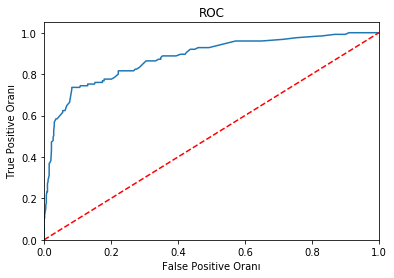

AUC : 0.7725414551607445


In [48]:
model.catmodel(X_train,X_test,y_train,y_test,LogisticRegression(solver = "liblinear"))

Sadece borç oranları ile model.

In [100]:
X_ = dff[["debtinc_score"]]

y = dff["bad"]

In [101]:
X_encoded = pd.get_dummies(X_ , prefix_sep = '_')

In [102]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 6)

In [62]:
model_deb = Model(dff)

Time  : 0.0
Confusion Matrix  :
[[533  58]
 [ 37  88]]
Accuracy  : 0.86731843575419
CV Score  : 0.8660602503912364
Model Report : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       591
           1       0.60      0.70      0.65       125

    accuracy                           0.87       716
   macro avg       0.77      0.80      0.78       716
weighted avg       0.88      0.87      0.87       716



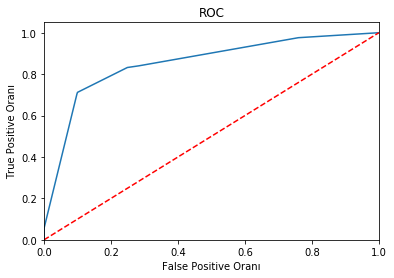

AUC : 0.8029306260575295


In [63]:
model_deb.catmodel(X_train,X_test,y_train,y_test,LogisticRegression(solver = "liblinear"))

# Decision Tree

In [90]:
dff.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,derog_obj,delinq_obj,ninq_obj,debtinc_score
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042,no_neg,not_late,not_inq,D
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479,no_neg,not_late,not_inq,D
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354,no_neg,not_late,inq12,C
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992,no_neg,not_late,inq12,D
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327,no_neg,not_late,not_inq,D


Sadece borç oranları ile model.

In [104]:
tre = Model(dff)

In [105]:
params = {   "min_samples_leaf" : [1,2,3,4] ,  
                "max_depth" : range(1,10),
                "min_samples_split" : [3,5,10,15,20,25,30]}

In [106]:
tre.Grid_CV(X_train,y_train,params,DecisionTreeClassifier())

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s


{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}


[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    9.1s finished


Time  : 0.0
Confusion Matrix  :
[[533  58]
 [ 37  88]]
Accuracy  : 0.86731843575419
CV Score  : 0.8660602503912364
Model Report : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       591
           1       0.60      0.70      0.65       125

    accuracy                           0.87       716
   macro avg       0.77      0.80      0.78       716
weighted avg       0.88      0.87      0.87       716



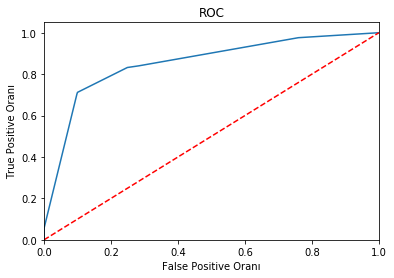

AUC : 0.8029306260575295


In [107]:
tre.catmodel(X_train,X_test,y_train,y_test,DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 1, min_samples_split = 3))

In [110]:
dms = pd.get_dummies(dff[["reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"]])
X_ = dff.drop(["bad","reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"],axis = 1)
X=pd.concat([X_,dms],axis=1)

y = dff["bad"]

In [111]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [112]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 33)

In [113]:
tre = Model(dff)

In [114]:
params = {   "min_samples_leaf" : [1,2,3,4] ,  
                "max_depth" : range(1,5),
                "min_samples_split" : [3,5,10,15,20,25,30]}

In [115]:
tre.Grid_CV(X_train,y_train,params,DecisionTreeClassifier())

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    9.0s finished


Time  : 0.031200200000000677
Confusion Matrix  :
[[553  38]
 [ 46  79]]
Accuracy  : 0.88268156424581
CV Score  : 0.8603873239436621
Model Report : 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       591
           1       0.68      0.63      0.65       125

    accuracy                           0.88       716
   macro avg       0.80      0.78      0.79       716
weighted avg       0.88      0.88      0.88       716



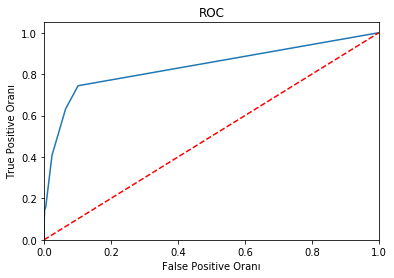

AUC : 0.7838510998307954


In [117]:
tre.catmodel(X_train,X_test,y_train,y_test,DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 3))

In [120]:
cart_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 3).fit(X_train,y_train)
# Tree çizdirmek için .

In [121]:
from matplotlib import pyplot as plt
from sklearn import tree

[Text(2235.5769230769233, 2642.5, 'debtinc <= 1.298\ngini = 0.327\nsamples = 2860\nvalue = [2272, 588]'),
 Text(1192.3076923076924, 1887.5, 'delinq_obj_not_late <= 0.5\ngini = 0.468\nsamples = 630\nvalue = [235, 395]'),
 Text(596.1538461538462, 1132.5, 'ninq <= 2.5\ngini = 0.304\nsamples = 235\nvalue = [44, 191]'),
 Text(298.0769230769231, 377.5, 'gini = 0.381\nsamples = 160\nvalue = [41, 119]'),
 Text(894.2307692307693, 377.5, 'gini = 0.077\nsamples = 75\nvalue = [3, 72]'),
 Text(1788.4615384615386, 1132.5, 'clage <= 177.915\ngini = 0.499\nsamples = 395\nvalue = [191, 204]'),
 Text(1490.3846153846155, 377.5, 'gini = 0.462\nsamples = 257\nvalue = [93, 164]'),
 Text(2086.538461538462, 377.5, 'gini = 0.412\nsamples = 138\nvalue = [98, 40]'),
 Text(3278.8461538461543, 1887.5, 'debtinc <= 45.483\ngini = 0.158\nsamples = 2230\nvalue = [2037, 193]'),
 Text(2980.769230769231, 1132.5, 'delinq <= 4.5\ngini = 0.129\nsamples = 2188\nvalue = [2037, 151]'),
 Text(2682.6923076923076, 377.5, 'gini = 

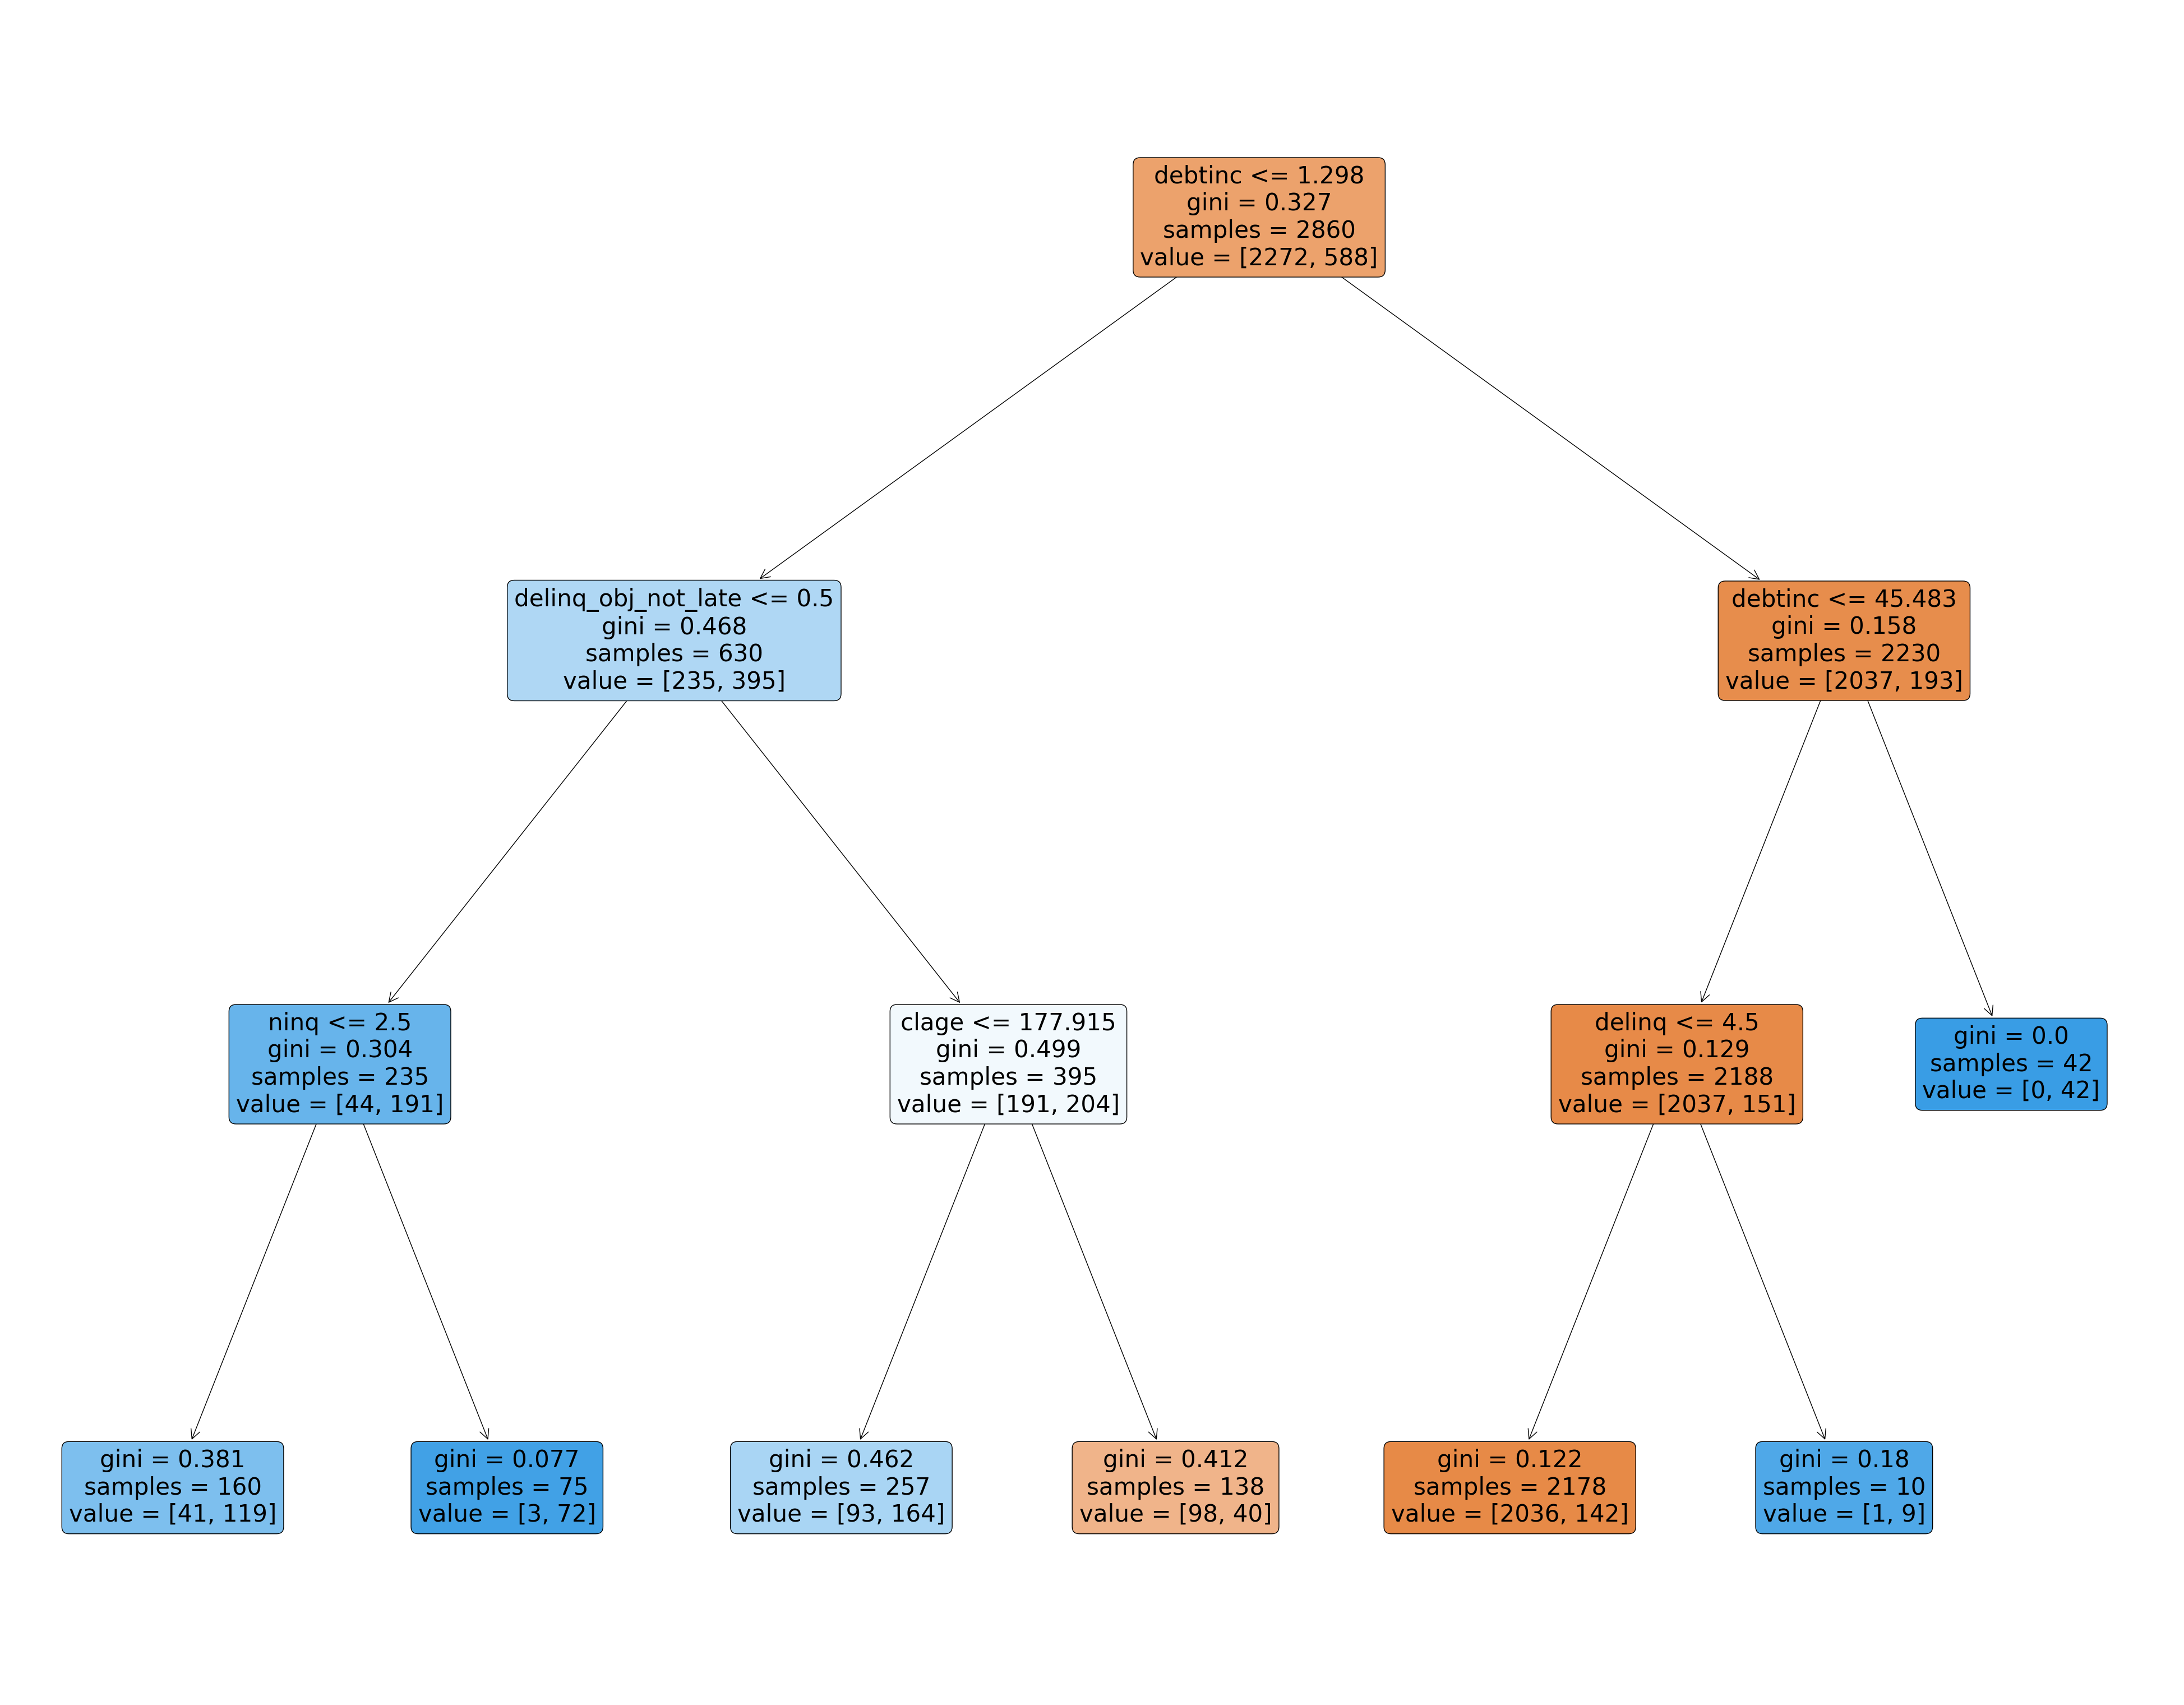

In [123]:
plt.figure(figsize=(50,40), dpi  = 100)
tree.plot_tree(cart_model,
               feature_names= X.columns,
              rounded = True,
              filled = True,
              impurity = True)
#plt.savefig("düz_ağaç.png")

# Random Forest Classifier

In [58]:
dms = pd.get_dummies(dff[["reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"]])
X_ = dff.drop(["bad","reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"],axis = 1)
X=pd.concat([X_,dms],axis=1)

y = dff["bad"]

In [59]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y)

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 33)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9120111731843575

In [54]:
print(confusion_matrix(y_test,y_pred))

[[570  21]
 [ 42  83]]


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       591
           1       0.80      0.66      0.72       125

    accuracy                           0.91       716
   macro avg       0.86      0.81      0.84       716
weighted avg       0.91      0.91      0.91       716



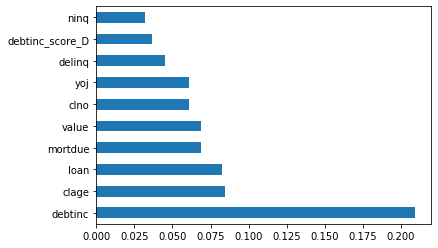

In [56]:
feature_importance = pd.Series(rf_model.feature_importances_,
                          index=X_train.columns)
feature_importance.nlargest(10).plot(kind= "barh")

In [130]:
# Feature importance bakmak için yapıldı XGBoost la karşılaştırılacak.

In [32]:
params = {      "max_depth" : [2,3,5],
                "max_features": [2,3,5,8],
                "min_samples_split" : [2,5,10],
                "n_estimators": [100,300,500]
         }

In [69]:
cat = Model(dff)

In [34]:
cat.Grid_CV(X_train,y_train,params,RandomForestClassifier(random_state=42))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 13.9min finished


{'max_depth': 5, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 300}


Time  : 1.3416085999999972
Confusion Matrix  :
[[567  24]
 [ 49  76]]
Accuracy  : 0.8980446927374302
CV Score  : 0.8813967136150234
Model Report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       591
           1       0.76      0.61      0.68       125

    accuracy                           0.90       716
   macro avg       0.84      0.78      0.81       716
weighted avg       0.89      0.90      0.89       716



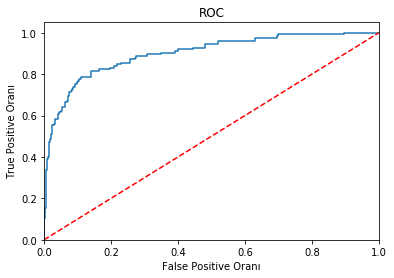

AUC : 0.7836954314720813


In [35]:
cat.catmodel(X_train,X_test,y_train,y_test,RandomForestClassifier(max_depth = 5, max_features =8, min_samples_split =5,n_estimators = 300,random_state=42))

# Neural Network

Time  : 9.765662600000013
Confusion Matrix  :
[[579  12]
 [ 95  30]]
Accuracy  : 0.8505586592178771


C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

CV Score  : 0.8073943661971832
Model Report : 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       591
           1       0.71      0.24      0.36       125

    accuracy                           0.85       716
   macro avg       0.79      0.61      0.64       716
weighted avg       0.83      0.85      0.82       716



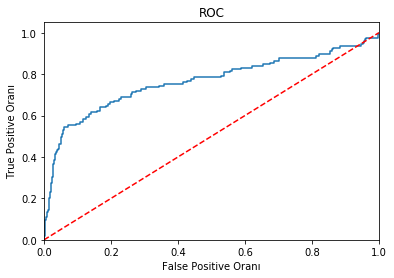

AUC : 0.6098477157360407


In [139]:
cat.catmodel(X_train,X_test,y_train,y_test,MLPClassifier(hidden_layer_sizes=(30,10)))

# Support Vector Machine

In [ ]:
cat.catmodel(X_train,X_test,y_train,y_test,SVC(kernel="linear"))

In [ ]:
#params = {   "C" : [1,2,3,4,5] ,  
      #       "kernel" : ["linear","rbf"]
    # }

In [57]:
# Uzun sürdüğü için teker teker denendi.

In [ ]:
cat.catmodel(X_train,X_test,y_train,y_test,SVC(kernel="linear",C=5))

Time  : 1034.0058282
Confusion Matrix  :
[[571  20]
 [ 84  41]]
Accuracy  : 0.8547486033519553


In [61]:
from sklearn.svm import SVC

In [62]:
svm_model = SVC(kernel="linear",C=5).fit(X_train,y_train)

In [63]:
svm_model

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
y_pred = svm_model.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.8547486033519553

In [66]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       591
           1       0.67      0.33      0.44       125

    accuracy                           0.85       716
   macro avg       0.77      0.65      0.68       716
weighted avg       0.84      0.85      0.83       716



# Naive-Bayes

BernoulliNB

Time  : 0.0
Confusion Matrix  :
[[534  57]
 [ 46  79]]
Accuracy  : 0.8561452513966481
CV Score  : 0.856338028169014
Model Report : 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       591
           1       0.58      0.63      0.61       125

    accuracy                           0.86       716
   macro avg       0.75      0.77      0.76       716
weighted avg       0.86      0.86      0.86       716



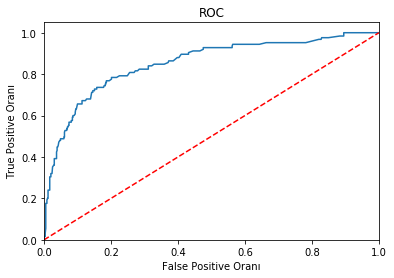

AUC : 0.767776649746193


In [69]:
cat.catmodel(X_train,X_test,y_train,y_test,BernoulliNB())

# Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [48]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
gb_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
params = {      "learning_rate" : [0.01,0.1,0.3,1],
                "n_estimators": [100,150,200,250,300,500],
                }

In [70]:
cat.Grid_CV(X_train,y_train,params,GradientBoostingClassifier())

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.9min finished


{'learning_rate': 0.3, 'n_estimators': 500}


Time  : 3.775224200000025
Confusion Matrix  :
[[564  27]
 [ 40  85]]
Accuracy  : 0.9064245810055865
CV Score  : 0.8925860719874805
Model Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       591
           1       0.76      0.68      0.72       125

    accuracy                           0.91       716
   macro avg       0.85      0.82      0.83       716
weighted avg       0.90      0.91      0.90       716



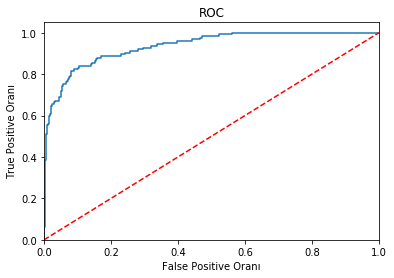

AUC : 0.8171573604060914


In [71]:
cat.catmodel(X_train,X_test,y_train,y_test,GradientBoostingClassifier(learning_rate=0.3,n_estimators = 500))

In [72]:
xgb_model = XGBClassifier().fit(X_train, y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Time  : 2.137213699999961
Confusion Matrix  :
[[572  19]
 [ 45  80]]
Accuracy  : 0.9106145251396648
CV Score  : 0.8925469483568076
Model Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       591
           1       0.81      0.64      0.71       125

    accuracy                           0.91       716
   macro avg       0.87      0.80      0.83       716
weighted avg       0.91      0.91      0.91       716



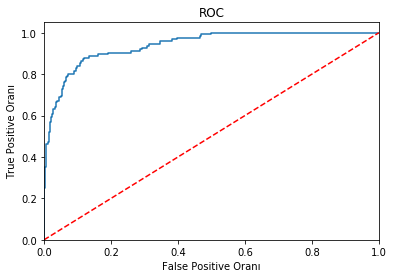

AUC : 0.8039255499153978


In [73]:
cat.catmodel(X_train,X_test,y_train,y_test,XGBClassifier())

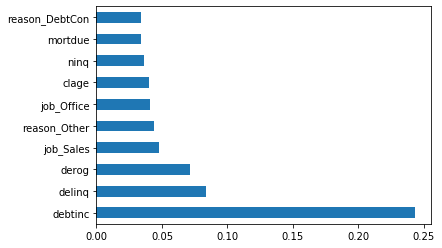

In [74]:
feature_importance = pd.Series(xgb_model.feature_importances_,
                          index=X_train.columns)
feature_importance.nlargest(10).plot(kind= "barh")

In [60]:
params = {      "learning_rate" : [0.01,0.1,0.3,1],
                "n_estimators": [100,150,200,250],
                }

In [61]:
cat.Grid_CV(X_train,y_train,params,XGBClassifier())

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.9min finished


{'learning_rate': 0.1, 'n_estimators': 150}


Time  : 3.042019499999995
Confusion Matrix  :
[[569  22]
 [ 43  82]]
Accuracy  : 0.909217877094972
CV Score  : 0.8953834115805946
Model Report : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       591
           1       0.79      0.66      0.72       125

    accuracy                           0.91       716
   macro avg       0.86      0.81      0.83       716
weighted avg       0.91      0.91      0.91       716



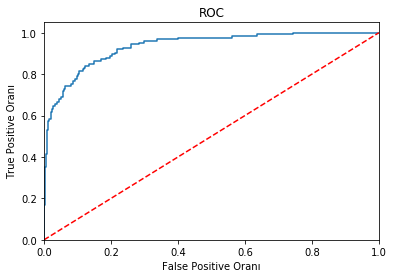

AUC : 0.8093874788494079


In [62]:
cat.catmodel(X_train,X_test,y_train,y_test,XGBClassifier(learning_rate = 0.1,n_estimators = 150))

# KNN

In [75]:
dms = pd.get_dummies(dff[["reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"]])
X_ = dff.drop(["bad","reason","job","derog_obj","delinq_obj","ninq_obj","debtinc_score"],axis = 1)
X=pd.concat([X_,dms],axis=1)

y = dff["bad"]

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)
X_train.shape

(2860, 33)

In [77]:
params = {"n_neighbors": np.arange(1,30)}

In [78]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.806993006993007
En iyi parametreler: {'n_neighbors': 23}


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(23)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

Time  : 0.046800299999972594
Confusion Matrix  :
[[589   2]
 [116   9]]
Accuracy  : 0.835195530726257
CV Score  : 0.8254499217527387
Model Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       591
           1       0.82      0.07      0.13       125

    accuracy                           0.84       716
   macro avg       0.83      0.53      0.52       716
weighted avg       0.83      0.84      0.77       716



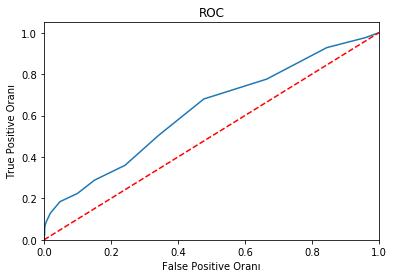

AUC : 0.5343079526226734


In [82]:
cat.catmodel(X_train,X_test,y_train,y_test,KNeighborsClassifier(23))